In [1]:
%tensorflow_version 2.x

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
classname = ["airplain", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

這個是第 7 類 為 horse


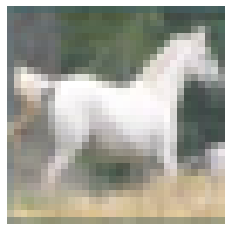

In [5]:
import random
import matplotlib.pyplot  as plt
%matplotlib inline
p = random.randint(0, 49999)
n = int(y_train[p])
plt.axis("off")
print("這個是第",n, "類", "為", classname[n])
plt.imshow(x_train[p])

In [6]:
from tensorflow.keras.applications import DenseNet169
cnn = DenseNet169(include_top=False, weights="imagenet", input_shape=(32, 32, 3))
cnn.summary()

Model: "densenet169"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
for i in cnn.layers:
  i.trainable = False
x = Flatten()(cnn.output)
#x = Dense(256, activation="relu")(x)
x = Dense(128, activation="relu")(x)
out = Dense(10, activation="softmax")(x)
model = Model(inputs=cnn.input, outputs=out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 16, 16, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint       
callback = [ EarlyStopping(patience=3, restore_best_weights=True),
            ModelCheckpoint("Cifar10_DenseNet169.h5", save_best_only=True)]

In [9]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(learning_rate=0.0001), 
              metrics=["accuracy"])
history = model.fit(x_train, y_train,
          batch_size=300, epochs=100,
          validation_split=0.1, callbacks=callback)

Epoch 1/100
150/150 [==============================] - 9s 62ms/step - loss: 3.1312 - accuracy: 0.2460 - val_loss: 2.1490 - val_accuracy: 0.3400
Epoch 2/100
150/150 [==============================] - 6s 42ms/step - loss: 1.9593 - accuracy: 0.3754 - val_loss: 1.8208 - val_accuracy: 0.4056
Epoch 3/100
150/150 [==============================] - 6s 42ms/step - loss: 1.7262 - accuracy: 0.4249 - val_loss: 1.6690 - val_accuracy: 0.4384
Epoch 4/100
150/150 [==============================] - 6s 42ms/step - loss: 1.6011 - accuracy: 0.4597 - val_loss: 1.5860 - val_accuracy: 0.4646
Epoch 5/100
150/150 [==============================] - 6s 42ms/step - loss: 1.5210 - accuracy: 0.4814 - val_loss: 1.5184 - val_accuracy: 0.4802
Epoch 6/100
150/150 [==============================] - 6s 43ms/step - loss: 1.4606 - accuracy: 0.4979 - val_loss: 1.4829 - val_accuracy: 0.4948
Epoch 7/100
150/150 [==============================] - 6s 42ms/step - loss: 1.4134 - accuracy: 0.5135 - val_loss: 1.4516 - val_accuracy:

In [10]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 1.2711 - accuracy: 0.5592


[1.2710787057876587, 0.5591999888420105]

In [11]:
model.predict(x_test)
# 輸出10個機率給你, 可以了解是否有梯度爆炸問題
# 要找到出最高的 index, 用 predict_classes 直接輸出分類

array([[4.4318978e-03, 3.2068759e-02, 9.3604224e-03, ..., 5.3577605e-03,
        3.2307024e-03, 2.0671121e-03],
       [5.4616425e-02, 1.3165225e-02, 1.5921553e-04, ..., 1.3894285e-06,
        9.2214149e-01, 9.9004954e-03],
       [1.3855110e-01, 4.1243978e-02, 2.2986526e-02, ..., 2.9490069e-02,
        5.1750183e-01, 1.6183490e-01],
       ...,
       [1.9535235e-04, 1.7237976e-04, 7.8252636e-02, ..., 3.0455869e-01,
        5.5633142e-04, 3.1539245e-04],
       [6.6419333e-02, 1.2427904e-01, 9.3404405e-02, ..., 2.5302541e-02,
        7.4035622e-04, 2.8024675e-02],
       [4.6306386e-04, 3.3401975e-03, 3.2093122e-03, ..., 9.5948064e-01,
        8.2920895e-05, 1.8296454e-03]], dtype=float32)

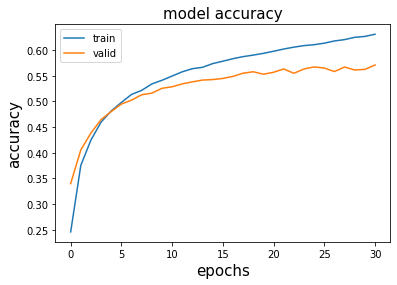

In [12]:
# 畫出 accuracy 圖
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy", fontsize=15)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("accuracy", fontsize=15)
plt.legend(["train", "valid"], loc="best")

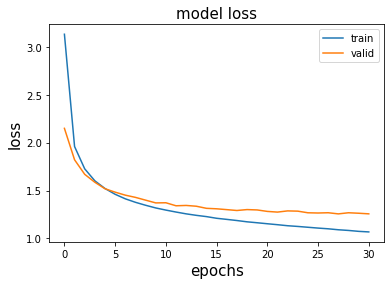

In [13]:
# 畫出 loss 圖
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss", fontsize=15)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("loss", fontsize=15)
plt.legend(["train", "valid"], loc="best")

#### 減少一個 Dense 讓參數更平滑, val_accuracy= 0.573
#### 減少 Dense 256, 直接接到 Dense 128 時, val_accuracy=
